Objective:
To demonstrate how Python can be used to analyze and optimize a personal investment portfolio to maximize returns and minimize risk.

Scenario:
John Doe has a diversified investment portfolio comprising stocks, bonds, and mutual funds. He wants to optimize his portfolio to achieve the best possible returns while minimizing risk.

Steps:
Data Collection:

Gather historical price data for the assets in the portfolio.
Collect relevant financial metrics (e.g., returns, volatility) for each asset.
Data Analysis:

Calculate the historical returns and volatility for each asset.
Compute the correlation matrix to understand how the assets move in relation to each other.
Portfolio Optimization:

Use the Modern Portfolio Theory (MPT) to construct an optimal portfolio.
Implement the Efficient Frontier to identify the best risk-return trade-offs.
Use the Sharpe Ratio to determine the optimal portfolio mix.
Visualization:

Create visualizations to show the performance of the optimized portfolio.
Plot the Efficient Frontier and highlight the optimal portfolio.
Simulation:

Perform a Monte Carlo simulation to understand the potential future performance of the portfolio under different market conditions.

# Implementation:
1. Data Collection:

In [1]:
import yfinance as yf
import pandas as pd

# List of assets in the portfolio
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical price data
data = yf.download(assets, start='2020-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()


[*********************100%%**********************]  5 of 5 completed


2. Data Analysis:

In [2]:
import numpy as np

# Calculate annualized returns and volatility
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# Compute the correlation matrix
correlation_matrix = returns.corr()


3. Portfolio Optimization:

In [7]:
import scipy.optimize as sco

# Define functions to calculate portfolio performance
def portfolio_performance(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_return, portfolio_volatility

def negative_sharpe_ratio(weights, returns, risk_free_rate=0.01):
    p_return, p_volatility = portfolio_performance(weights, returns)
    return -(p_return - risk_free_rate) / p_volatility

# Constraints: weights sum to 1 and weights are non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(len(assets)))

# Initial guess for weights
initial_guess = len(assets) * [1. / len(assets)]

# Optimize portfolio
result = sco.minimize(negative_sharpe_ratio, initial_guess, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized weights
optimized_weights = result.x


4. Visualization:

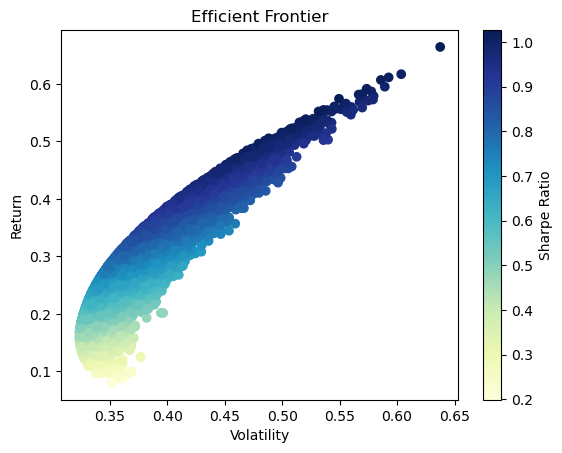

In [4]:
import matplotlib.pyplot as plt

# Function to plot the Efficient Frontier
def plot_efficient_frontier(returns, num_portfolios=50000):
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(assets))
        weights /= np.sum(weights)
        p_return, p_volatility = portfolio_performance(weights, returns)
        results[0,i] = p_volatility
        results[1,i] = p_return
        results[2,i] = (p_return - 0.01) / p_volatility

    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Efficient Frontier')
    plt.show()

# Plot the Efficient Frontier
plot_efficient_frontier(returns)


5. Simulation:

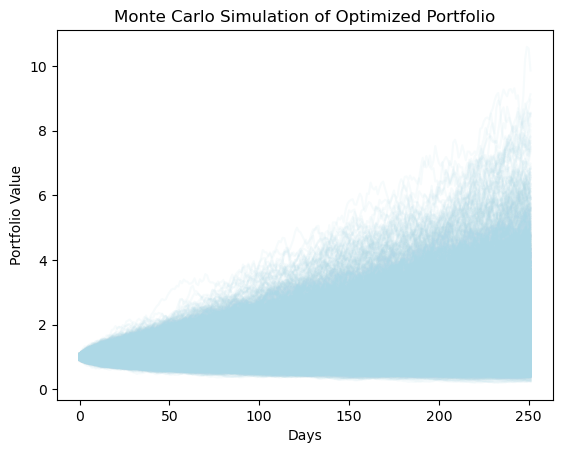

In [5]:
# Monte Carlo Simulation
def monte_carlo_simulation(returns, num_simulations=10000, num_days=252):
    simulation_results = np.zeros((num_simulations, num_days))
    for i in range(num_simulations):
        random_walk = np.random.normal(returns.mean(), returns.std(), (num_days, len(assets)))
        simulation_results[i, :] = np.cumprod(1 + random_walk @ optimized_weights)
    return simulation_results

# Run simulation
sim_results = monte_carlo_simulation(returns)

# Plot simulation results
plt.plot(sim_results.T, color='lightblue', alpha=0.1)
plt.title('Monte Carlo Simulation of Optimized Portfolio')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()


Conclusion:
This case study demonstrates how Python can be utilized to optimize a personal investment portfolio by leveraging financial data analysis, portfolio optimization techniques, and simulation. The implementation showcases practical steps and code to perform each stage of the process, providing a comprehensive approach to portfolio management.